<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/lista2_FTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

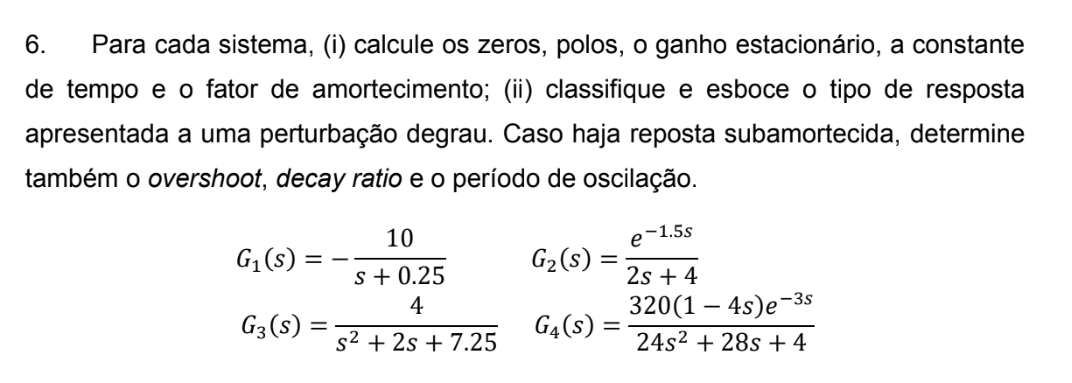

In [1]:
! pip install -qq control

In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [3]:
def calcula_zpk(G):
  z = ct.zero(G) # zeros
  p = ct.pole(G) # polos
  K = ct.dcgain(G) # ganho estacionário
  print('zero = ', z)
  print('polo = ', p)
  print(f'ganho = {K:1.3f}')
  if len(p)<2:
    # apenas para sistemas de primeira ordem
    print(f'constante de tempo = {1/abs(p[0]):1.3f}')

def caracteristica_2ordem(G):
  num, den = ct.tfdata(G) # fornece o numerador e denominador de uma FT
  deng = den[0][0] # representa o denominador (den = a*s**2 + b*s + c)
  tau = np.sqrt(deng[0]/deng[2]) # periodo natural: sqrt(a/c)
  xi = (deng[1]/deng[2])/(2*tau) # fator de amortecimento: (b/c) / (2*tau)
  print(f'Período natural = {tau:1.3f}')
  print(f'Fator de amortecimento = {xi:1.3f}')
  if np.real(xi) < 1.0:
    # apenas para sistemas subamortecidos
    tp = np.pi*tau/np.sqrt(1-xi**2) # tempo de pico (quando surge o overshoot)
    ts = 7*tau/xi # tempo de assentamento (reposta alcança o estado estacionário)
    OS = np.exp(-np.pi*xi/np.sqrt(1-xi**2)) # Overshoot (elevação em relação ao valor final)
    DR = OS**2 # taxa de decaimento das oscilações
    print(f'%Overshoot = {100*OS: 1.3f}')
    print(f'Decay ratio = {DR:1.3f}')
    print(f'Tempo de pico = {tp:1.3f}')
    print(f'Tempo de assentamento = {ts:1.3f}')

def resposta_degrau(G):
  plt.figure(figsize = (5,3))
  # resposta ao degrau unitário (deve-se usar o tempo-morto)
  t, y = ct.step_response(G)
  plt.plot(t,y)
  plt.xlabel('Tempo, t')
  plt.ylabel('Saída do sistema, y')
  plt.title('Resposta ao degrau unitário')
  plt.grid()


  -10
--------
s + 0.25

zero =  []
polo =  [-0.25+0.j]
ganho = -40.000
constante de tempo = 4.000


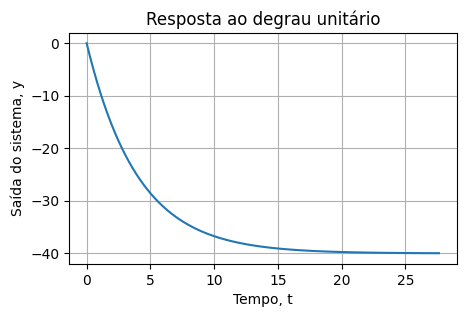

In [4]:
G1 = ct.tf(-10,[1,0.25])
print(G1)
calcula_zpk(G1)
resposta_degrau(G1)

**Análise**: Este sistema de primeira ordem possui um ganho negativo, uma constante de tempo relativamente grande (considerando que esteja em minutos) e um polo único real negativo em s = -0.25. Isso significa que o sistema responderá lentamente a mudanças na entrada, tomando pelo menos 20 minutos para alcançar o estado estacionário. Alem disso, a resposta será amplificada em 40 vezes frente a um degrau unitário, mas invertida em fase (sinal negativo).


   1
-------
2 s + 4

zero =  []
polo =  [-2.+0.j]
ganho = 0.250
constante de tempo = 0.500


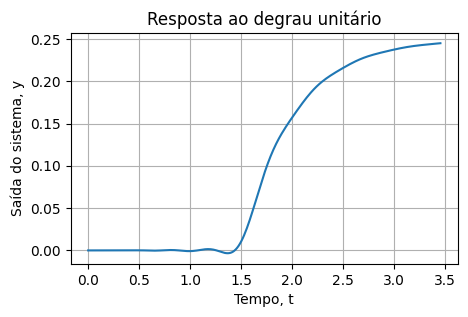

In [5]:
G2 = ct.tf(1,[2,4])
G_td = ct.tf(*ct.pade(1.5,14,10)) # deve-se ajustar a ordem da aproximação de Pade
print(G2)
calcula_zpk(G2)
resposta_degrau(G2*G_td) # incluindo o tempo-morto em série com o sistema

**Análise**: Este sistema possui um ganho positivo de 0.25, o que significa que a resposta será atenuada em relação à entrada. A constante de tempo de 0.5 indica que o sistema é relativamente rápido em responder a mudanças na entrada. No entanto, o tempo morto de 1.5 unidades de tempo representa um atraso significativo na resposta do sistema. O polo em s = -2 influenciará o decaimento da resposta exponencial, mas dado o tempo morto, a resposta inicial não exibe alterações. Portanto, esse sistema é caracterizado por uma resposta atrasada devido ao tempo morto de 1.5 unidades de tempo, porém rápida após esse período.


       4
----------------
s^2 + 2 s + 7.25

zero =  []
polo =  [-1.+2.5j -1.-2.5j]
ganho = 0.552
Período natural = 0.371
Fator de amortecimento = 0.371
%Overshoot =  28.461
Decay ratio = 0.081
Tempo de pico = 1.257
Tempo de assentamento = 7.000


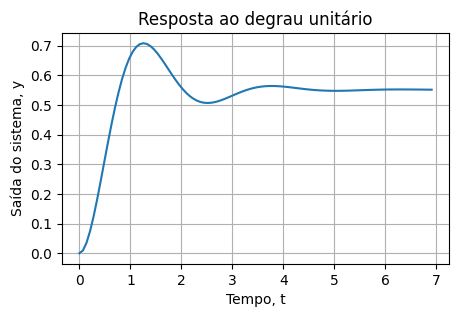

In [6]:
G3 = ct.tf(4,[1,2,7.25])
print(G3)
calcula_zpk(G3)
caracteristica_2ordem(G3)
resposta_degrau(G3)

**Análise**: O sistema de segunda ordem possui dois polos complexos conjugados, indicando um comportamento oscilatório ou subamortecido. O ganho é moderado, o que significa que a amplitude da resposta não é excessivamente amplificada. O fator de amortecimento e o período natural são aproximadamente iguais. O sistema apresenta um overshoot de aproximadamente 28.461%, o que significa que a resposta ultrapassa o valor de estado estacionário antes de convergir para ele -  alcançando aproximadamente o valor máximo de 0.709. O tempo de pico é de aproximadamente 1.257 unidades de tempo, e o tempo de assentamento é de aproximadamente 7 unidades de tempo.


  -1280 s + 320
-----------------
24 s^2 + 28 s + 4

zero =  [0.25+0.j]
polo =  [-1.        +0.j -0.16666667+0.j]
ganho = 80.000
Período natural = 2.449
Fator de amortecimento = 1.429


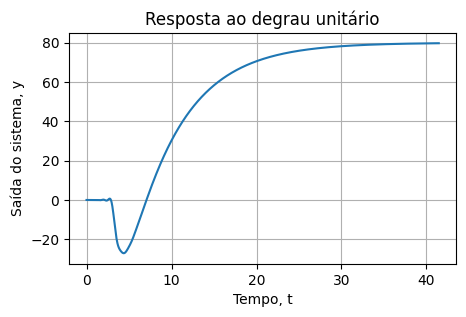

In [7]:
G4 = 320*ct.tf([-4, 1],[24,28,4])
G_td = ct.tf(*ct.pade(3,14,10)) # deve-se ajustar a ordem da aproximação de Pade
print(G4)
calcula_zpk(G4)
caracteristica_2ordem(G4)
resposta_degrau(G4*G_td) # incluindo o tempo-morto em série com o sistema

**Análise**: Este sistema de segunda ordem com um zero positivo inicialmente apresentará uma resposta inversa em relação à entrada antes de atingir o valor de estado estacionário. Isso ocorre devido à presença do zero em z = 0.25. Isso somado ao tempo-morto atrasa fortemente a resposta dinâmica. Posteriormente, o sistema se comportará de acordo com os polos reais, que indicam um comportamento superamortecido ou não-oscilatório, pois o fator de amortecimento ($\xi$) é maior que 1. O período natural ($\tau$) é relativamente grande, o que sugere um sistema lento. O ganho alto de 80 amplifica significativamente a resposta em relação à entrada, o que pode levar a uma resposta com grandes amplitudes. Em resumo, esse sistema de segunda ordem com um zero positivo inicialmente apresentará uma resposta inversa antes de atingir o valor de estado estacionário. Posteriormente, ele seguirá na direação do valor final sem exibir oscilações devido à presença de dois polos reais.